In [52]:
## IMPORT THE PANDAS LIBRARY AND READ THE CSV FILE

import pandas as pd

In [53]:
df=pd.read_csv("Encoding Data.csv")
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


**ORDINAL ENCODER**

In [54]:
### PERFORMING THE ORDINAL ENCODER
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [55]:
pm=['Hot','Warm','Cold']

el=OrdinalEncoder(categories=[pm])

el.fit_transform(df[["ord_2"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.]])

In [56]:
df['bo2']=el.fit_transform(df[["ord_2"]])

df

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,Hot,0.0
1,1,F,Y,Blue,Warm,1.0
2,2,F,N,Blue,Cold,2.0
3,3,F,N,Green,Warm,1.0
4,4,T,N,Red,Cold,2.0
5,5,T,N,Green,Hot,0.0
6,6,F,N,Red,Cold,2.0
7,7,T,N,Red,Cold,2.0
8,8,F,N,Blue,Warm,1.0
9,9,F,Y,Red,Hot,0.0


In [57]:
df['ord_2']=el.fit_transform(df[["ord_2"]])
df

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,0.0,0.0
1,1,F,Y,Blue,1.0,1.0
2,2,F,N,Blue,2.0,2.0
3,3,F,N,Green,1.0,1.0
4,4,T,N,Red,2.0,2.0
5,5,T,N,Green,0.0,0.0
6,6,F,N,Red,2.0,2.0
7,7,T,N,Red,2.0,2.0
8,8,F,N,Blue,1.0,1.0
9,9,F,Y,Red,0.0,0.0


**OneHotEncoder**

In [58]:
### PERFORMING THE ONEHOTENCODER
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe=OneHotEncoder(sparse=False)
df2=df.copy()
df2

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,0.0,0.0
1,1,F,Y,Blue,1.0,1.0
2,2,F,N,Blue,2.0,2.0
3,3,F,N,Green,1.0,1.0
4,4,T,N,Red,2.0,2.0
5,5,T,N,Green,0.0,0.0
6,6,F,N,Red,2.0,2.0
7,7,T,N,Red,2.0,2.0
8,8,F,N,Blue,1.0,1.0
9,9,F,Y,Red,0.0,0.0


In [60]:
enc=pd.DataFrame(ohe.fit_transform(df2[["nom_0"]]))

enc

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [61]:
df2=pd.concat([df2,enc],axis=1)

df2

,id,bin_1,bin_2,nom_0,ord_2,bo2,0,1,2
0,0,F,N,Red,0.0,0.0,0.0,0.0,1.0
1,1,F,Y,Blue,1.0,1.0,1.0,0.0,0.0
2,2,F,N,Blue,2.0,2.0,1.0,0.0,0.0
3,3,F,N,Green,1.0,1.0,0.0,1.0,0.0
4,4,T,N,Red,2.0,2.0,0.0,0.0,1.0
5,5,T,N,Green,0.0,0.0,0.0,1.0,0.0
6,6,F,N,Red,2.0,2.0,0.0,0.0,1.0
7,7,T,N,Red,2.0,2.0,0.0,0.0,1.0
8,8,F,N,Blue,1.0,1.0,1.0,0.0,0.0
9,9,F,Y,Red,0.0,0.0,0.0,0.0,1.0


In [62]:
pd.get_dummies(df2,columns=["nom_0"])

,id,bin_1,bin_2,ord_2,bo2,0,1,2,nom_0_Blue,nom_0_Green,nom_0_Red
0,0,F,N,0.0,0.0,0.0,0.0,1.0,0,0,1
1,1,F,Y,1.0,1.0,1.0,0.0,0.0,1,0,0
2,2,F,N,2.0,2.0,1.0,0.0,0.0,1,0,0
3,3,F,N,1.0,1.0,0.0,1.0,0.0,0,1,0
4,4,T,N,2.0,2.0,0.0,0.0,1.0,0,0,1
5,5,T,N,0.0,0.0,0.0,1.0,0.0,0,1,0
6,6,F,N,2.0,2.0,0.0,0.0,1.0,0,0,1
7,7,T,N,2.0,2.0,0.0,0.0,1.0,0,0,1
8,8,F,N,1.0,1.0,1.0,0.0,0.0,1,0,0
9,9,F,Y,0.0,0.0,0.0,0.0,1.0,0,0,1


**BinaryEncoder**

In [63]:
pip install --Upgrade category_encoders # type: ignore

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\ProgramData\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  c:\ProgramData\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --Upgrade


In [64]:
### IMPORT BINARY ENCODER FROM CATEGORY ENCODERS:
from category_encoders import BinaryEncoder

In [65]:
df=pd.read_csv("data.csv")

In [66]:
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [67]:
be=BinaryEncoder()

In [68]:
nd=be.fit_transform(df['Ord_2'])

dfb=pd.concat([df,nd],axis=1)

dfb1=dfb.copy()

dfb1

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,Ord_2_0,Ord_2_1,Ord_2_2
0,0,F,N,Delhi,Hot,High School,0,0,0,1
1,1,F,Y,Bangalore,Warm,Masters,1,0,1,0
2,2,M,N,Mumbai,Very Hot,Diploma,1,0,1,1
3,3,M,Y,Chennai,Cold,Bachelors,0,1,0,0
4,4,M,Y,Delhi,Cold,Bachelors,1,1,0,0
5,5,F,N,Delhi,Very Hot,Masters,0,0,1,0
6,6,M,N,Chennai,Warm,PhD,1,1,0,1
7,7,F,N,Chennai,Hot,High School,1,0,0,1
8,8,M,N,Delhi,Very Hot,High School,0,0,0,1
9,9,F,Y,Delhi,Warm,PhD,0,1,0,1


**TargetEncoder**

In [69]:
### IMPORT THE TARGET ENCODER FROM CATEGORY ENCODERS
from category_encoders import TargetEncoder
te=TargetEncoder()
cc=df.copy()
new=te.fit_transform(X=cc["City"],y=cc["Target"])
cc=pd.concat([cc,new],axis=1)
cc

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,City
0,0,F,N,Delhi,Hot,High School,0,0.445272
1,1,F,Y,Bangalore,Warm,Masters,1,0.565054
2,2,M,N,Mumbai,Very Hot,Diploma,1,0.565054
3,3,M,Y,Chennai,Cold,Bachelors,0,0.525744
4,4,M,Y,Delhi,Cold,Bachelors,1,0.445272
5,5,F,N,Delhi,Very Hot,Masters,0,0.445272
6,6,M,N,Chennai,Warm,PhD,1,0.525744
7,7,F,N,Chennai,Hot,High School,1,0.525744
8,8,M,N,Delhi,Very Hot,High School,0,0.445272
9,9,F,Y,Delhi,Warm,PhD,0,0.445272


**FEATURE TRANSFORMATION**

In [70]:
### IMPORT PANDAS, SCIPY AND NUMPY TO PERFORM FEATURE TRANFORMATION:

import pandas as pd
from scipy import stats
import numpy as np

In [71]:
df=pd.read_csv("Data_to_Transform.csv")
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [72]:
### FIND THE SKEWNESS TO FIND THE NEGATIVE AND POSITIVE SKEW:
df.skew()

Moderate Positive Skew    0.656308
Highly Positive Skew      1.271249
Moderate Negative Skew   -0.690244
Highly Negative Skew     -1.201891
dtype: float64

In [73]:
np.log(df["Highly Positive Skew"])

0       1.063011
1       1.085995
2       1.087342
3       1.098720
4       1.102640
          ...   
9995    2.790522
9996    2.797053
9997    2.839253
9998    2.869515
9999    2.893275
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [74]:
df["Highly Positive Skew"]=np.sqrt(df["Highly Positive Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,1.701492,11.180748,9.027485
1,1.113554,1.721158,10.842938,9.009762
2,1.156830,1.722317,10.817934,9.006134
3,1.264131,1.732144,10.764570,9.000125
4,1.323914,1.735543,10.753117,8.981296
...,...,...,...,...
9995,14.749050,4.036027,-2.980821,-3.254882
9996,14.854474,4.049229,-3.147526,-3.772332
9997,15.262103,4.135576,-3.517256,-4.717950
9998,15.269983,4.198627,-4.689833,-5.670496


In [75]:
df["Moderate Negative Skew"]=np.square(df["Moderate Negative Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,1.701492,125.009116,9.027485
1,1.113554,1.721158,117.569305,9.009762
2,1.156830,1.722317,117.027691,9.006134
3,1.264131,1.732144,115.875961,9.000125
4,1.323914,1.735543,115.629522,8.981296
...,...,...,...,...
9995,14.749050,4.036027,8.885297,-3.254882
9996,14.854474,4.049229,9.906918,-3.772332
9997,15.262103,4.135576,12.371089,-4.717950
9998,15.269983,4.198627,21.994536,-5.670496


In [76]:
np.sqrt(df["Highly Negative Skew"])

c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       3.004577
1       3.001627
2       3.001022
3       3.000021
4       2.996881
          ...   
9995         NaN
9996         NaN
9997         NaN
9998         NaN
9999         NaN
Name: Highly Negative Skew, Length: 10000, dtype: float64

In [77]:
df.skew()

Moderate Positive Skew    0.656308
Highly Positive Skew      0.800174
Moderate Negative Skew    0.347926
Highly Negative Skew     -1.201891
dtype: float64

In [78]:
df['Highly Positive Skew_boxcox'],parameters=stats.boxcox(df['Highly Positive Skew'])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox
0,0.899990,1.701492,125.009116,9.027485,0.406454
1,1.113554,1.721158,117.569305,9.009762,0.412961
2,1.156830,1.722317,117.027691,9.006134,0.413339
3,1.264131,1.732144,115.875961,9.000125,0.416529
4,1.323914,1.735543,115.629522,8.981296,0.417623
...,...,...,...,...,...
9995,14.749050,4.036027,8.885297,-3.254882,0.728851
9996,14.854474,4.049229,9.906918,-3.772332,0.729595
9997,15.262103,4.135576,12.371089,-4.717950,0.734340
9998,15.269983,4.198627,21.994536,-5.670496,0.737679


In [79]:
df["Moderate Negative Skew_YEOJOHNSON"],parameters=stats.yeojohnson(df["Moderate Negative Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Moderate Negative Skew_YEOJOHNSON
0,0.899990,1.701492,125.009116,9.027485,0.406454,36.126249
1,1.113554,1.721158,117.569305,9.009762,0.412961,34.631506
2,1.156830,1.722317,117.027691,9.006134,0.413339,34.521485
3,1.264131,1.732144,115.875961,9.000125,0.416529,34.286965
4,1.323914,1.735543,115.629522,8.981296,0.417623,34.236684
...,...,...,...,...,...,...
9995,14.749050,4.036027,8.885297,-3.254882,0.728851,5.404500
9996,14.854474,4.049229,9.906918,-3.772332,0.729595,5.872033
9997,15.262103,4.135576,12.371089,-4.717950,0.734340,6.943482
9998,15.269983,4.198627,21.994536,-5.670496,0.737679,10.616453


In [80]:
df.skew()

Moderate Positive Skew               0.656308
Highly Positive Skew                 0.800174
Moderate Negative Skew               0.347926
Highly Negative Skew                -1.201891
Highly Positive Skew_boxcox          0.023089
Moderate Negative Skew_YEOJOHNSON   -0.124867
dtype: float64

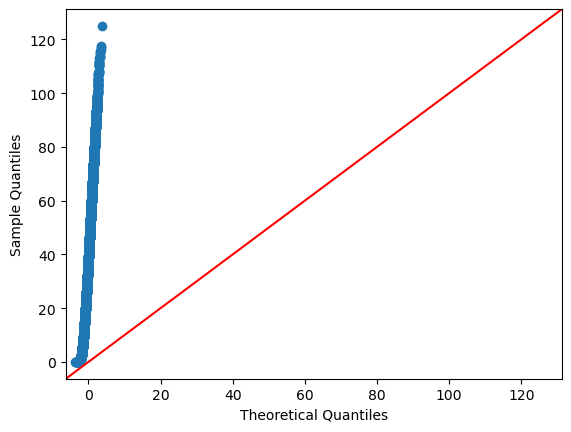

In [81]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


sm.qqplot(df['Moderate Negative Skew'],line='45')
plt.show()

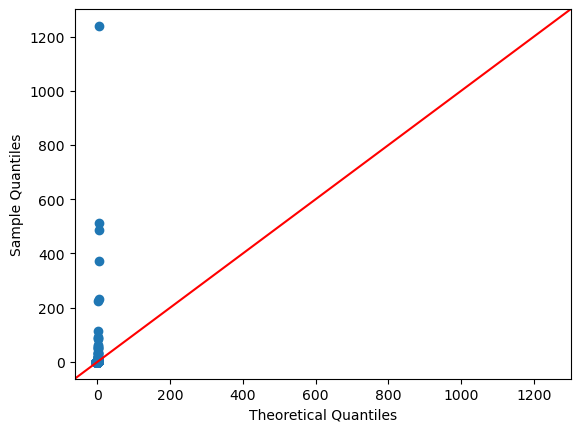

In [82]:
sm.qqplot(np.reciprocal(df['Moderate Negative Skew']),line='45')
plt.show()

In [83]:
from sklearn.preprocessing import QuantileTransformer

qt=QuantileTransformer(output_distribution='normal')

df["Moderate Negative Skew"]

0       125.009116
1       117.569305
2       117.027691
3       115.875961
4       115.629522
           ...    
9995      8.885297
9996      9.906918
9997     12.371089
9998     21.994536
9999     40.140828
Name: Moderate Negative Skew, Length: 10000, dtype: float64

In [84]:
df["Moderate Negative Skew_1"] = qt.fit_transform(df["Moderate Negative Skew"].values.reshape(-1, 1))

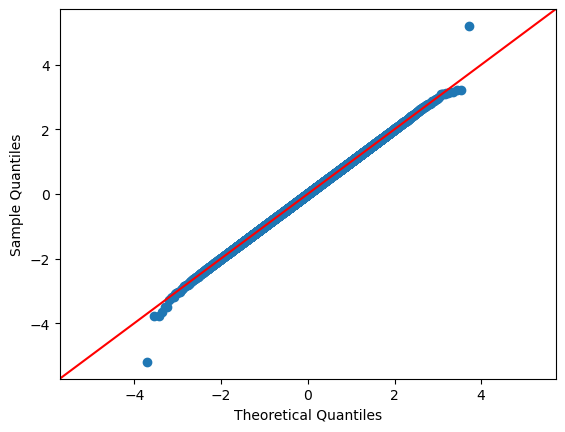

In [85]:
sm.qqplot(df['Moderate Negative Skew_1'],line='45')
plt.show()

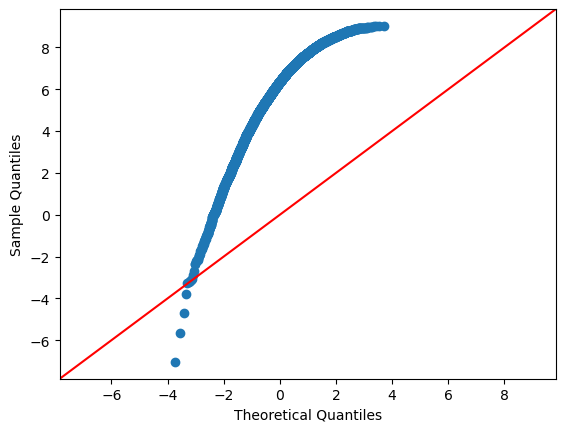

In [86]:
df["Highly Negative Skew_1"]=qt.fit_transform(df[["Highly Negative Skew"]])
sm.qqplot(df['Highly Negative Skew'],line='45')
plt.show()

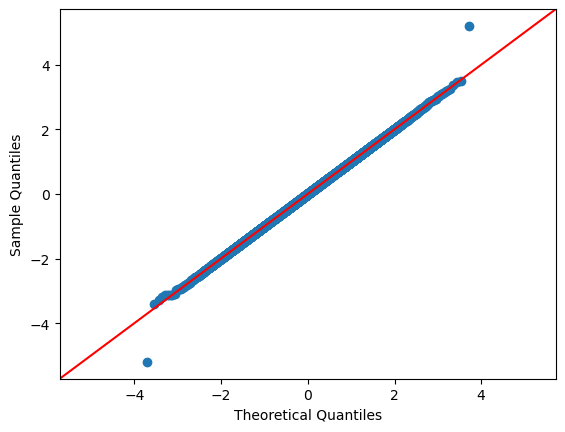

In [87]:
sm.qqplot(df['Highly Negative Skew_1'],line='45')
plt.show()

In [88]:
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Moderate Negative Skew_YEOJOHNSON,Moderate Negative Skew_1,Highly Negative Skew_1
0,0.899990,1.701492,125.009116,9.027485,0.406454,36.126249,5.199338,5.199338
1,1.113554,1.721158,117.569305,9.009762,0.412961,34.631506,3.224632,3.503580
2,1.156830,1.722317,117.027691,9.006134,0.413339,34.521485,3.204457,3.453669
3,1.264131,1.732144,115.875961,9.000125,0.416529,34.286965,3.165449,3.386210
4,1.323914,1.735543,115.629522,8.981296,0.417623,34.236684,3.157695,3.239746
...,...,...,...,...,...,...,...,...
9995,14.749050,4.036027,8.885297,-3.254882,0.728851,5.404500,-1.403190,-3.131880
9996,14.854474,4.049229,9.906918,-3.772332,0.729595,5.872033,-1.327936,-3.174835
9997,15.262103,4.135576,12.371089,-4.717950,0.734340,6.943482,-1.190541,-3.272809
9998,15.269983,4.198627,21.994536,-5.670496,0.737679,10.616453,-0.714898,-3.419532
